In [158]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder

In [159]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['train_test'] = 1
test['train_test'] = 0
test['SalePrice'] = np.NaN
all_data = pd.concat([train,test])

In [160]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  train_test  
0       WD         Normal     208500           1  
1       WD         Normal     181500           1  
2       WD         Normal     223500           1  
3       WD        Abnorml     140000           1  
4       WD         Normal     250000           1  

[5 rows x 82 columns]

__________________________

## 1.Understading the Data

In [161]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [162]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.000000   
max     547.000000     552.000000   508.000000   480.000000   738.000000   

            MiscVal       MoSold       YrSold      SalePrice  train_test  
count   1460.000000  1460.000000  1460.000000    1460.000000      1460.0  
mean      43.489041     6.321918  2007.815753  180921.195890         1.0  
std      496.123024     2.703626     1.328095   79442.502883         0.0  
min        0.000000     1.000000  2006.000000   34900.000000         1.0  
25%        0.000000     5.000000  2007.000000  129975.000000         1.0  
50%        0.000000     6.000000  2008.000000  163000.000000         1.0  
75%        0.000000     8.000000  2009.000000  214000.000000         1.0  
max    15500.000000    12.000000  2010.000000  755000.000000         1.0  

[8 rows x 39 columns]

## a.Correlation with target

<AxesSubplot:>

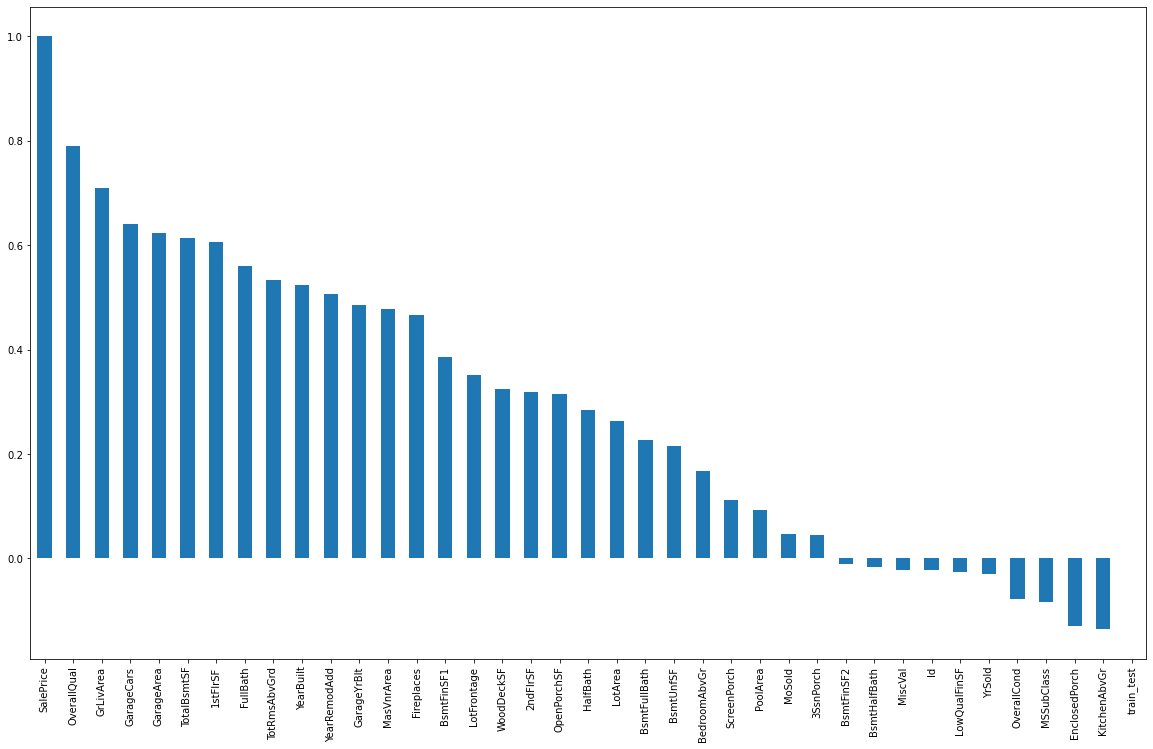

In [163]:
corr_matrix = train.corr()
corr_matrix['SalePrice'].sort_values(ascending=False).plot.bar(figsize=(20,12))

In [164]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
train_test  

It seems a good idea to engineer features bases on highly correlated variables

In [165]:
num_features = ['OverallQual','GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',         
'FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr']

array([[<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'GarageCars'}>,
        <AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'GarageYrBlt'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'BsmtFul

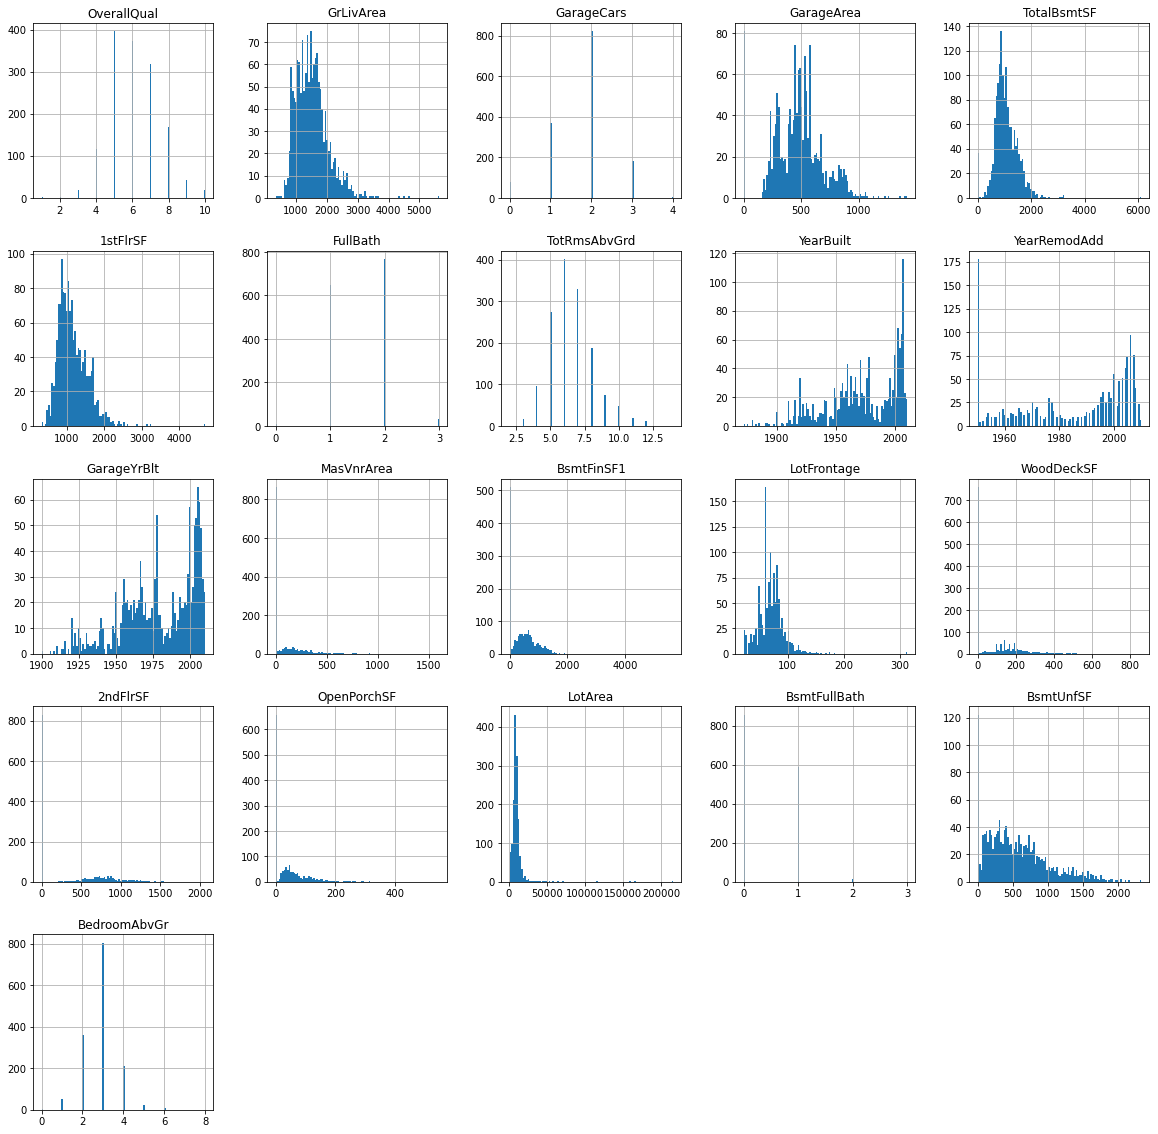

In [166]:
train[num_features].hist(bins=100, figsize=(20,20))

In [167]:
#a few non-normal distributions

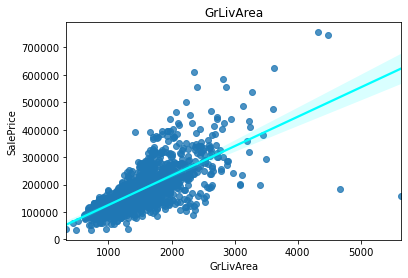

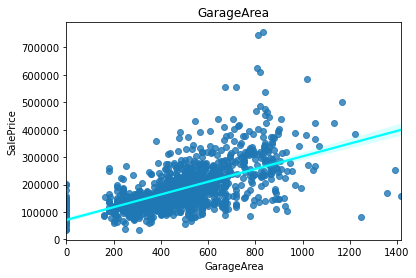

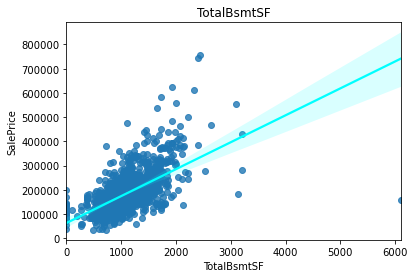

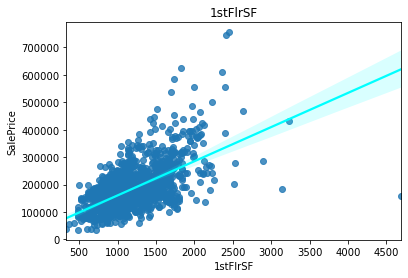

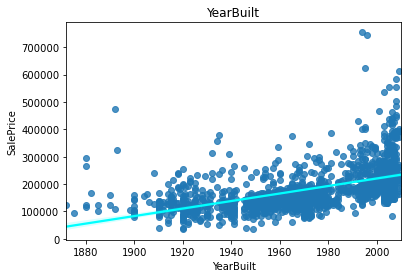

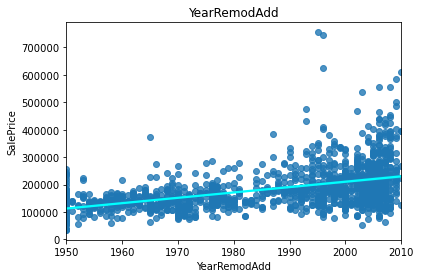

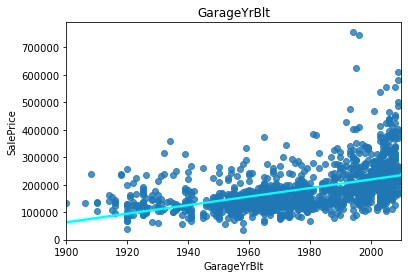

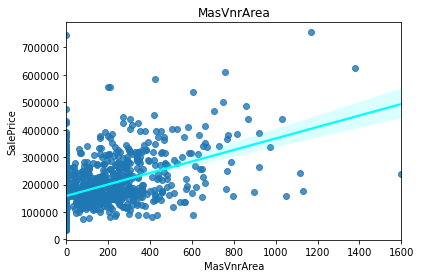

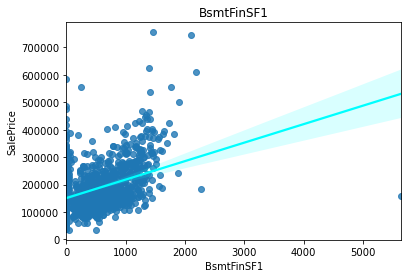

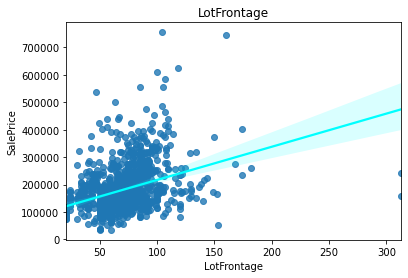

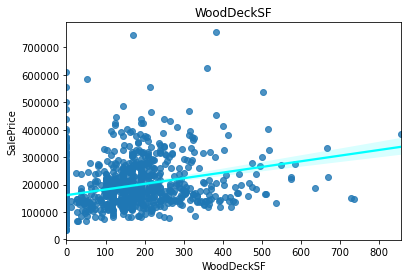

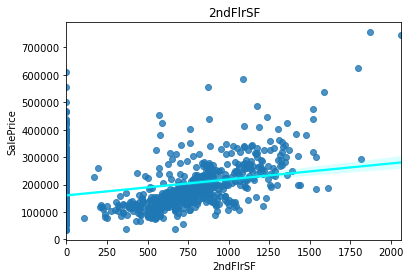

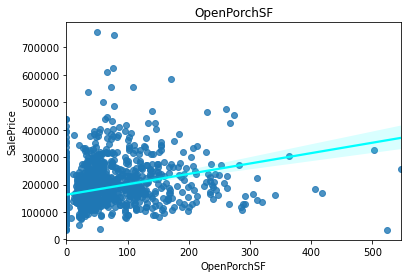

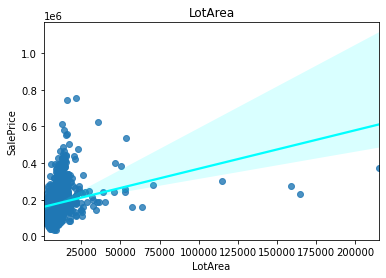

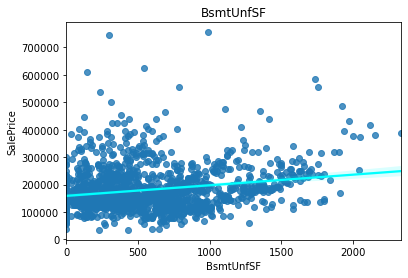

In [168]:
corr_features = ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt','YearRemodAdd','GarageYrBlt', 'MasVnrArea','BsmtFinSF1', 'LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF',  'LotArea', 'BsmtUnfSF']

for col in corr_features:
    sns.regplot(train[col], train['SalePrice'], line_kws={'color':'cyan'})
    plt.title(col)
    plt.show()


In [169]:
#a lot of these have a lot of zero values and quite a few outliers

<AxesSubplot:>

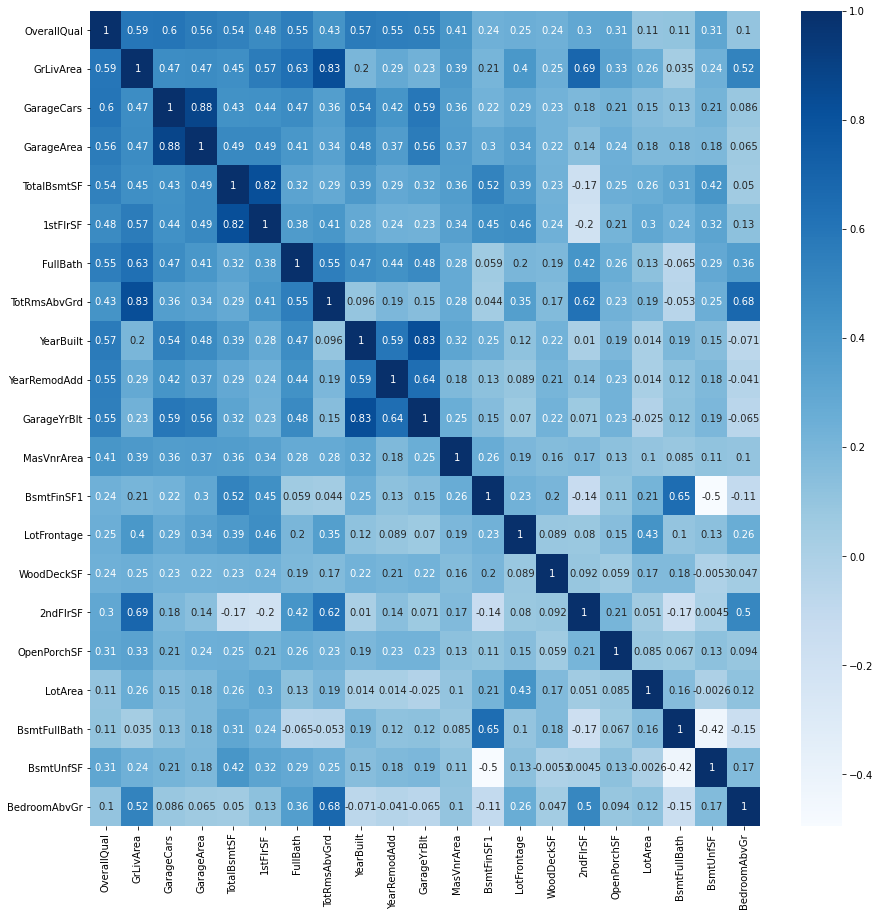

In [170]:
plt.figure(figsize=(15, 15))
sns.heatmap(train[num_features].corr(), cmap='Blues', annot=True)

In [171]:
#There's potential for interaction features here
#but some minor multicollinearity 

## b.Categorical features 

In [172]:
cat_features = ['Neighborhood','BsmtQual','ExterQual','FireplaceQu','ExterCond',
                   'KitchenQual','LotShape','OverallQual', 'FullBath','HalfBath',
                   'TotRmsAbvGrd','Fireplaces','KitchenAbvGr']

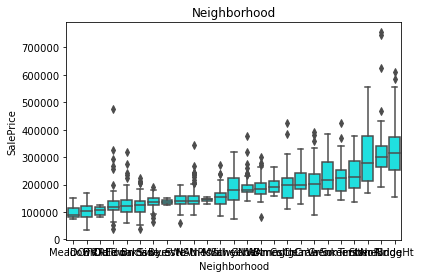

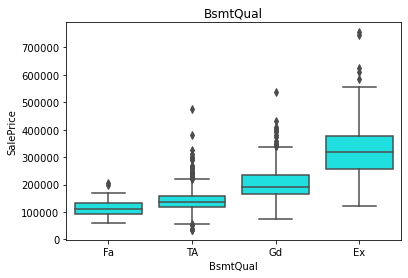

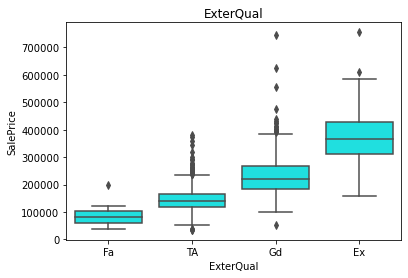

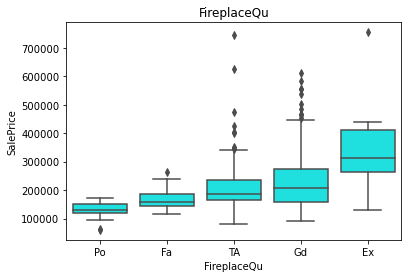

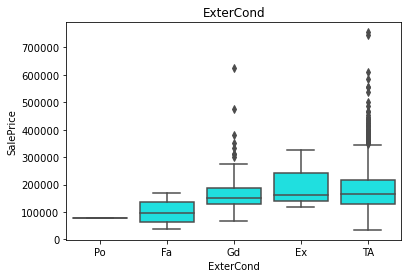

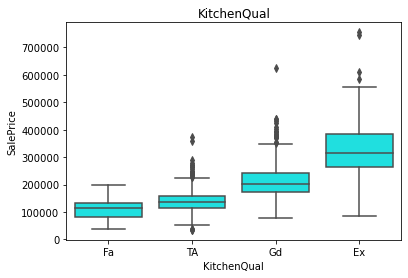

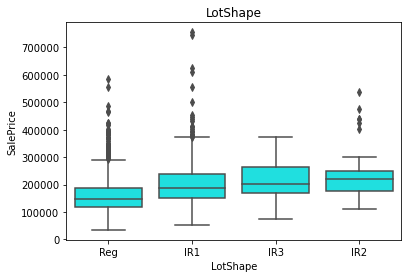

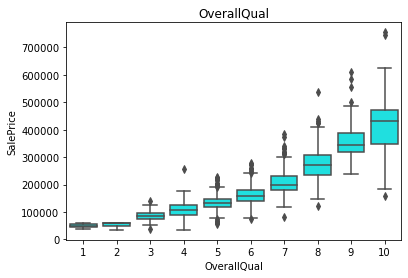

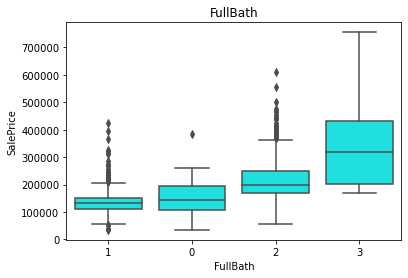

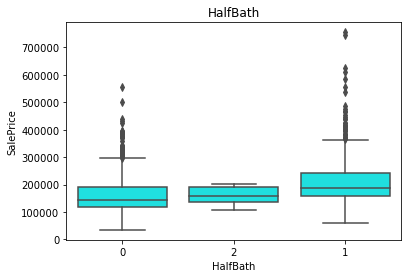

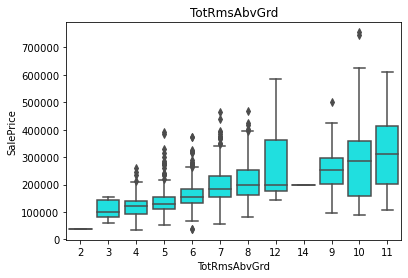

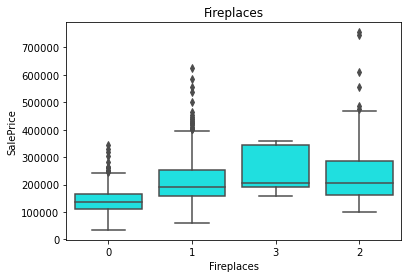

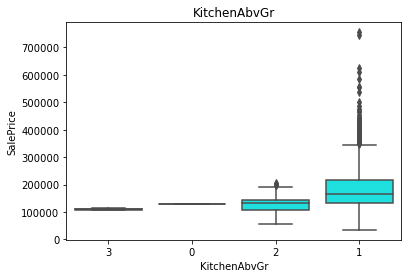

In [173]:
for col in cat_features:
    order = train.groupby(by=col)['SalePrice'].median().sort_values().index
    sns.boxplot(train[col], train['SalePrice'], order=order, orient='v', color='#00FFFF')
    plt.title(col)
    plt.show()

In [174]:
# a lot of these features seems strong too. 

In [175]:
 features = ['OverallQual','GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',         
'FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt', 'MasVnrArea', 'Fireplaces','BsmtFinSF1', 'LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'Neighborhood','BsmtQual','ExterQual','FireplaceQu','ExterCond','KitchenQual','LotShape',]


In [176]:
# Of the more correlated variables, which have Na values?
allnavalues = pd.DataFrame(all_data[features].isna().sum()[all_data[features].isna().sum() > 0].sort_values())
allnavalues['percent'] = (allnavalues.iloc[:,0] / len(all_data))*100
allnavalues

0    percent
GarageCars       1   0.034258
GarageArea       1   0.034258
TotalBsmtSF      1   0.034258
BsmtFinSF1       1   0.034258
BsmtUnfSF        1   0.034258
KitchenQual      1   0.034258
BsmtFullBath     2   0.068517
MasVnrArea      23   0.787941
BsmtQual        81   2.774923
GarageYrBlt    159   5.447071
LotFrontage    486  16.649538
FireplaceQu   1420  48.646797

In [177]:
#All quite low excpet LotFrontage. In some cases it may be variables which are applicable to the house. 
#However, are a lot are just from 1 missing row. We can't drop it as it's required for the competition. 

#GarageCars	:set to mean
#GarageArea	:set to mean
#TotalBsmtSF	:set to mean
#BsmtFinSF1	:set to mean
#BsmtUnfSF	:set to mean
#KitchenQual	:set to mean
#BsmtFullBath:set to mean
#MasVnrArea	:set to 0
#BsmtQual	:set to mean
#GarageYrBlt	:set to mean
#LotFrontage	:set to 0
#FireplaceQu	:drop
features = ['OverallQual','GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',         
'FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt', 'MasVnrArea', 'Fireplaces','BsmtFinSF1', 'LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'Neighborhood','BsmtQual','ExterQual','ExterCond','KitchenQual','LotShape',]

In [178]:
#skew and kurtosis 
print ('Skew:\n', abs(train[features].skew())[abs(train[features].skew()) > 3 ])
print ()
print ('kurtosis:\n', abs(train[features].kurtosis())[abs(train[features].kurtosis()) > 8 ])

Skew:
 LotArea    12.207688
dtype: float64

kurtosis:
 TotalBsmtSF     13.250483
MasVnrArea      10.082417
BsmtFinSF1      11.118236
LotFrontage     17.452867
OpenPorchSF      8.490336
LotArea        203.243271
dtype: float64


In [179]:
# These will need powertranform ['LotArea', 'TotalBsmtSF', 'MasVnrArea' , 'BsmtFinSF1', 'LotFrontage', 'OpenPorchSF']

In [180]:
skew_kurt = ['LotArea', 'TotalBsmtSF', 'MasVnrArea' , 'BsmtFinSF1', 'LotFrontage', 'OpenPorchSF']

---------------------------------------------------------------------------------------

## 2.Prep. the data <br>
###  Dealing with na values 

In [181]:
#GarageCars	:set to mean
#GarageArea	:set to mean
#TotalBsmtSF	:set to mean
#BsmtFinSF1	:set to mean
#BsmtUnfSF	:set to mean
#KitchenQual	:set to 0
#BsmtFullBath:set to mean
#MasVnrArea	:set to 0
#BsmtQual	:set to 0
#GarageYrBlt	:set to mean
#LotFrontage	:set to 0
#FireplaceQu	:drop

In [182]:
set_to_mean = ['GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath', 'GarageYrBlt']
set_to_zero = ['KitchenQual', 'MasVnrArea', 'BsmtQual', 'LotFrontage', 'FireplaceQu']


for col in set_to_mean:
    train[col] = train[col].fillna(train[col].mean())
    test[col] = test[col].fillna(test[col].mean())

for col in set_to_zero:
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)

### Feature Engineering 

In [183]:
train['Age_YrBuilt'] = train['YrSold'] - train['YearBuilt']
test['Age_YrBuilt'] = test['YrSold'] - test['YearBuilt']

train['Age_YrRemod'] = train['YrSold'] - train['YearRemodAdd']
test['Age_YrRemod'] = test['YrSold'] - test['YearRemodAdd']

train['Age_Garage'] = train['YrSold'] - train['GarageYrBlt']
test['Age_Garage'] = test['YrSold'] - test['GarageYrBlt']

train['Remodeled'] = train['YearBuilt']!=train['YearRemodAdd']
test['Remodeled'] = test['YearBuilt']!=test['YearRemodAdd']

train['Age_YrBuilt'] = train['Age_YrBuilt'].apply(lambda x: 0 if x <0 else x)
test['Age_YrBuilt'] = test['Age_YrBuilt'].apply(lambda x: 0 if x <0 else x)

train['Age_YrRemod'] = train['Age_YrRemod'].apply(lambda x: 0 if x <0 else x)
test['Age_YrRemod'] = test['Age_YrRemod'].apply(lambda x: 0 if x <0 else x)

train['Age_Garage'] = train['Age_Garage'].apply(lambda x: 0 if x <0 else x)
test['Age_Garage'] = test['Age_Garage'].apply(lambda x: 0 if x <0 else x)

train['Qual_area'] = train['OverallQual'] * train['GrLivArea']
test['Qual_area'] = test['OverallQual'] * train['GrLivArea']

train['Car_area'] = train['GarageCars'] * train['GarageArea']
test['Car_area'] = test['GarageCars'] * test['GarageArea']

In [184]:
#['Age_YrBuilt', 'Age_YrRemod', 'Age_Garage', 'Qual_area', 'Car_area', 'Remodeled']
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... SaleType SaleCondition SalePrice train_test  \
0         Lvl    AllPub  ...       WD        Normal    208500          1   
1         Lvl    AllPub  ...       WD        Normal    181500          1   
2         Lvl    AllPub  ...       WD        Normal    223500          1   
3         Lvl    AllPub  ...       WD       Abnorml    140000          1   
4         Lvl    AllPub  ...       WD        Normal    250000          1   

  Age_YrBuilt Age_YrRemod Age_Garage  Remodeled  Qual_area  Car_area  
0           5           5        5.0      False      11970      1096  
1          31          31       31.0      False       7572       920  
2           7           6        7.0       True      12502      1216  
3          91          36        8.0       True      12019      1926  
4           8           8        8.0      False      17584      2508  

[5 rows x 88 columns]

In [185]:
to_rank = ['Neighborhood', 'OverallQual', 'SaleCondition','HeatingQC', 'FireplaceQu']

for i in to_rank:
    rank = np.array(range(0,len(train[i].unique())))
    value = train.groupby(i)['SalePrice'].median().sort_values().index
    rank_mapping = dict(zip(value,rank))
    train[i + '_rank'] = (train[i].map(rank_mapping))

for i in to_rank:
    rank = np.array(range(0,len(test[i].unique())))
    value = test.groupby(i)['SalePrice'].median().sort_values().index
    rank_mapping = dict(zip(value,rank))
    test[i + '_rank'] = (test[i].map(rank_mapping))


In [186]:
#['Neighborhood_rank', 'OverallQual_rank', 'SaleCondition_rank','HeatingQC_rank', 'FireplaceQu_rank']

### Distribution Problems 

In [187]:
# Powertransform ['LotArea', 'TotalBsmtSF', 'MasVnrArea' , 'BsmtFinSF1', 'LotFrontage', 'OpenPorchSF']
pt = PowerTransformer(standardize=False)
skew_kurt 

train[skew_kurt] = pt.fit_transform(train[skew_kurt])
test[skew_kurt]  = pt.transform(test[skew_kurt])

array([[<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'OpenPorchSF'}>]], dtype=object)

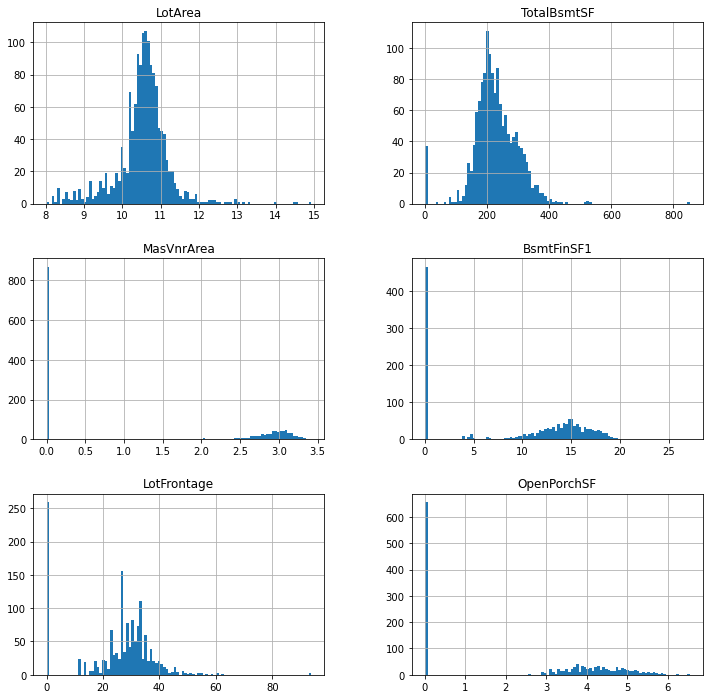

In [188]:
train[skew_kurt].hist(bins=100, figsize=(12,12))

In [189]:
# Looks a bit better but still some outliers.

### Cat_features

In [190]:
['Neighborhood','BsmtQual','ExterQual','ExterCond','KitchenQual', 'LotShape']

['Neighborhood',
 'BsmtQual',
 'ExterQual',
 'ExterCond',
 'KitchenQual',
 'LotShape']

In [191]:
to_encode = ['Neighborhood','ExterQual','ExterCond','KitchenQual', 'LotShape']
OH = OneHotEncoder(sparse=False,handle_unknown='ignore')


OH_cols_train = pd.DataFrame(OH.fit_transform(train[to_encode]))
OH_cols_test = pd.DataFrame(OH.transform(test[to_encode]))

OH_cols_train.index = train.index
OH_cols_test.index = test.index

OH_train = pd.concat([train, OH_cols_train], axis=1)
OH_test = pd.concat([test, OH_cols_test], axis=1)

### Standard Scaler

In [192]:
features = ['OverallQual','GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',         
'FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt', 'MasVnrArea', 'Fireplaces','BsmtFinSF1', 'LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 'Age_YrBuilt', 'Age_YrRemod', 'Age_Garage',                 'Neighborhood_rank', 'OverallQual_rank', 'SaleCondition_rank','HeatingQC_rank','FireplaceQu_rank',                'Qual_area', 'Car_area','Remodeled']
Id = OH_test['Id']

In [193]:
#standar scaler
scaler = StandardScaler() 

OH_train[features] = scaler.fit_transform(OH_train[features])
OH_test[features] = scaler.transform(OH_test[features])

### make train and test sets

In [194]:
X_train = OH_train[features]
y_train = OH_train['SalePrice']

X_test = OH_test[features]

## 3.Train Models

In [195]:
#1.SVR
#2.Lasso
#3.ElasticNet
#4.RandomForest
#5.XGBRegressor

from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

SVR = SVR()
las = Lasso()
elastic = ElasticNet()
rf = RandomForestRegressor()
xgbr = XGBRegressor(objective ='reg:squarederror')


In [196]:
#1.SVR
SVR.fit(X_train,y_train)
cv = cross_val_score(SVR, X_train, y_train,cv=5, error_score='neg_root_mean_squared_error', n_jobs=-1)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [-0.06943765 -0.0599594  -0.05561942 -0.01514612 -0.05432901]
Cross val mean: -0.0508983202298869


In [197]:
#2.Lasso
las.fit(X_train,y_train)
cv = cross_val_score(las, X_train, y_train,cv=5, error_score='neg_root_mean_squared_error', n_jobs=-1)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.90035705 0.8087391  0.87498104 0.85295524 0.70235971]
Cross val mean: 0.8278784255924829


In [198]:
#3.ElasticNet
elastic.fit(X_train,y_train)
cv = cross_val_score(elastic, X_train, y_train,cv=5, error_score='neg_root_mean_squared_error', n_jobs=-1)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.89723006 0.8415269  0.85227855 0.85253571 0.75000596]
Cross val mean: 0.8387154353888976


In [199]:
#4.RandomForest
rf.fit(X_train,y_train)
cv = cross_val_score(rf, X_train, y_train,cv=5, error_score='neg_root_mean_squared_error', n_jobs=-1)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.87917087 0.84456794 0.88833446 0.89525309 0.86391935]
Cross val mean: 0.8742491415410798


In [200]:
#5.XGBRegressor
xgbr.fit(X_train,y_train)
cv = cross_val_score(xgbr, X_train, y_train,cv=5, error_score='neg_root_mean_squared_error',n_jobs=-1)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.8968744  0.85373029 0.89776273 0.8940277  0.88820956]
Cross val mean: 0.8861209353683701


## 4.Tune Model

In [201]:
#1.SVR
param_grid = {'C':[0.6, 0.7, 0.8, 0.9, 1],'epsilon':[0.3,0.4,0.5], 'coef0':[0.1, 0.001, 0.0001]}

SVR_grid = GridSearchCV(SVR, param_grid, cv=5, verbose=True, return_train_score=True, error_score='neg_root_mean_squared_error', n_jobs=-1)

SVR_grid.fit(X_train, y_train)
print (SVR_grid.best_score_, SVR_grid.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   18.1s finished
-0.0508983202298869 {'C': 1, 'coef0': 0.1, 'epsilon': 0.4}


In [202]:
#2.Lasso 
param_grid = { 'alpha': [0.0001,0.001, 0.01, 0.1, 1], 'max_iter' : [30, 40, 45]}
las_grid = GridSearchCV(las, param_grid,  cv=5, verbose=True, return_train_score=True, n_jobs=-1)

las_grid.fit(X_train, y_train)

print (las_grid.best_score_, las_grid.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
0.8310460186513764 {'alpha': 1, 'max_iter': 40}
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.7s finished


In [203]:
#3.ElasticNet
param_grid = {'alpha': [0.001, 0.5, 1.0], 'max_iter' : [150, 170, 175], 'l1_ratio': [0.3, 0.4, 0.45] }
elastic_grid = GridSearchCV(elastic, param_grid,  cv=5, verbose=True, return_train_score=True, n_jobs=-1)

elastic_grid.fit(X_train, y_train)

print (elastic_grid.best_score_, elastic_grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
0.8395861525652212 {'alpha': 0.5, 'l1_ratio': 0.4, 'max_iter': 170}
[Parallel(n_jobs=-1)]: Done 120 out of 135 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    1.5s finished


In [210]:
#4.RandomForest
param_grid = { 'n_estimators': [325, 350, 400],'max_features': ['sqrt'],'max_depth' : [15, 20, 25],}
rf_grid = GridSearchCV(rf, param_grid,  cv=5, verbose=True, return_train_score=True,n_jobs=-1)

rf_grid.fit(X_train, y_train)

print (rf_grid.best_score_, rf_grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   18.5s finished
0.8810950644358451 {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 350}


In [205]:
#0.8656328964513506 {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 20}

In [206]:
#5.XGBRegressor
param_grid = {
        'num_boost_round': [10, 15, 20],
        'eta': [0.01, 0.02, 0.03],
        'max_depth': [3, 5, 7],
        'subsample': [0.3, 0.5, 0.9],
        'colsample_bytree': [0.3, 0.5, 0.9],
    }
xgbr_grid = GridSearchCV(xgbr, param_grid, cv=5, verbose=True, return_train_score=True, error_score='neg_root_mean_squared_error', n_jobs=-1)

xgbr_grid.fit(X_train, y_train)
print (xgbr_grid.best_score_, xgbr_grid.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  1.8min finished
0.8936765369933302 {'colsample_bytree': 0.5, 'eta': 0.01, 'max_depth': 5, 'num_boost_round': 10, 'subsample': 0.9}


In [207]:
#0.883414105342815 {'colsample_bytree': 0.9, 'eta': 0.05, 'max_depth': 5, 'num_boost_round': 10, 'subsample': 0.9}

### Stacking 

In [211]:
from sklearn.ensemble import StackingRegressor
SVR_best = SVR_grid.best_estimator_
xgbr_best = xgbr_grid.best_estimator_
rf_best = rf_grid.best_estimator_
las_best = las_grid.best_estimator_
elastic_best = elastic_grid.best_estimator_

estimators =[SVR_best, xgbr_best, rf_best]
estimators = [('SVR_best', SVR_best),
              ('xgbr_best', xgbr_best), # try without this 
              ('rf_best', rf_best),
              ('las_best', las_best), #change later
              ('elastic_best', elastic_best) #change later
              ]

stack = StackingRegressor(estimators, verbose=True, cv=5,n_jobs=-1)

stack.fit(X_train,y_train)
cv = cross_val_score(stack, X_train, y_train,cv=5, error_score='neg_root_mean_squared_error')
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.90457584 0.85771489 0.89885672 0.91616421 0.86995364]
Cross val mean: 0.8894530590849123


_______________________

In [209]:
feature_importances= rf_grid.best_estimator_.feature_importances_
sorted(zip(feature_importances, all_features ), reverse=True)

[(0.13999410564806813, 'FireplaceQu_rank'),
 (0.09595804470537304, 'Neighborhood_rank'),
 (0.07694524304420691, 'Id'),
 (0.060877998315017785, 'Age_Garage'),
 (0.05583243743594888, 'OverallQual'),
 (0.05339171843156033, 'Qual_area'),
 (0.043177824040470554, 'GarageArea'),
 (0.04014386279996341, 'TotalBsmtSF'),
 (0.03934673854401904, 'GrLivArea'),
 (0.030653819095111678, 'GarageCars'),
 (0.030404645043803115, 41),
 (0.026998579605463924, 'TotRmsAbvGrd'),
 (0.02251943913092545, 27),
 (0.02217169474814792, 'Fireplaces'),
 (0.0204496740301641, 'WoodDeckSF'),
 (0.01868483255928512, 'YearRemodAdd'),
 (0.016248719282031674, 'Age_YrRemod'),
 (0.01576420784745623, 'HalfBath'),
 (0.012835249416277053, 'HeatingQC_rank'),
 (0.012558447250427455, '1stFlrSF'),
 (0.012005987090294316, 'FullBath'),
 (0.011932702390957915, 'MasVnrArea'),
 (0.011360475427469124, 'YearBuilt'),
 (0.011317122171890832, 33),
 (0.010894904192614364, 'Age_YrBuilt'),
 (0.010757201844171824, 'GarageYrBlt'),
 (0.0096938748129049

In [212]:
#predictions =xgbr_best_.predict(X_test)
#predictions = rf_best.predict(X_test)
predictions =stack.predict(X_test)

In [214]:
final_data = {'Id': Id, 'SalePrice': predictions}
submission = pd.DataFrame(data=final_data)
submission.to_csv('submission.csv', index =False)

In [83]:
#interaction engineer LATER
#drop ID form X

#compare model in table 
#grid and random
#feature imporatnces #drop poor feature importnaces 
#ensable 
#MAYBE REMOVE POWER TRANSFORMER
#CHANGE OH AND SCALER TO PIPLINE

# #log transform y BUT also try without

